# Probabilities, Gausians, and Bayes

In [1]:
import math
import random
import scipy
import numpy as np
import kf_book.book_plots as book_plots
import matplotlib.pyplot as plt
from scipy.stats import norm
import filterpy.stats
from filterpy.stats import gaussian
from filterpy.stats import norm_cdf
from filterpy.stats import rand_student_t
from filterpy.stats import plot_gaussian_pdf
from ipywidgets import interact, FloatSlider
from kf_book.gaussian_internal import plot_height_std

Sum =  1.0


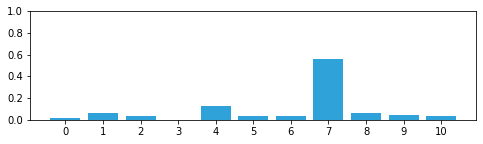

In [2]:
belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)

with book_plots.figsize(y = 2):
    book_plots.bar_plot(belief)
print('Sum = ', np.sum(belief))

In [3]:
x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
print('Mean = ', np.mean(x))
print('Mean = ', x.mean() )
print('{:.2f} meters squared'.format(np.var(x)))
print('std {:.4f}'.format(np.std(x)))
print('var {:.4f}'.format(np.std(x)**2))

Mean =  1.8
Mean =  1.8
0.02 meters squared
std 0.1414
var 0.0200


In [4]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= 0.8:
        total += 1
    elif r < 0.95:
        total += 3
    else:
        total += 5
print('Expected: ', total/N)

Expected:  1.501304


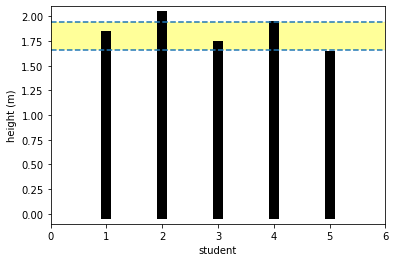

In [5]:
 plot_height_std(x)

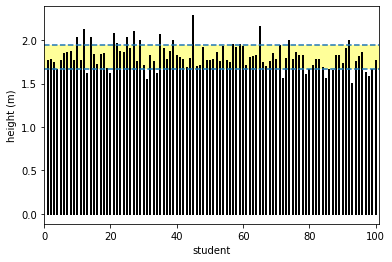

mean = 1.804
std = 0.140


In [6]:
data  = 1.8 + np.random.randn(100) * 0.1414
mean, std = data.mean(), data.std()
plot_height_std(data, lw = 2)
print('mean = {:.3f}'.format(mean))
print('std = {:.3f}'.format(std))

In [7]:
np.sum((data > mean - std) & (data < mean + std))/len(data) * 100

69.0

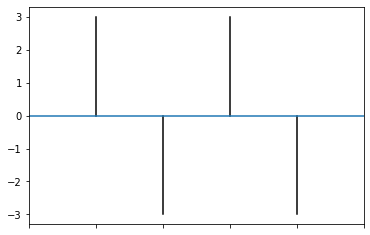

In [8]:
X = [3, -3, 3, -3]
mean =  np.average(X)
for i in range(len(X)):
    plt.plot([i, i], [mean, X[i]], color = 'k')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis = 'x', labelbottom = False)

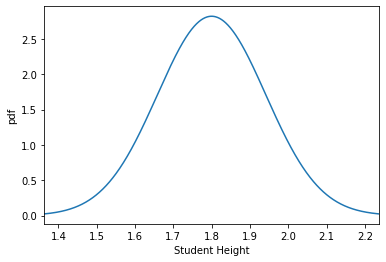

In [9]:
plot_gaussian_pdf(mean = 1.8, variance = 0.1414**2, xlabel = 'Student Height', ylabel = 'pdf')

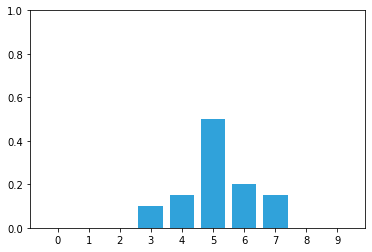

In [10]:
belief = [0, 0, 0, 0.1, 0.15, 0.5, 0.2, 0.15, 0, 0]
book_plots.bar_plot(belief)

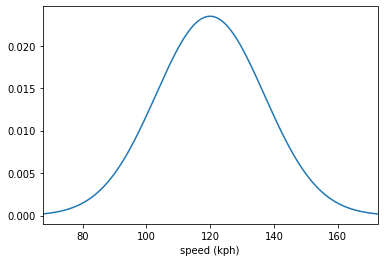

In [11]:
plot_gaussian_pdf(mean = 120, variance = 17 ** 2, xlabel = 'speed (kph)')

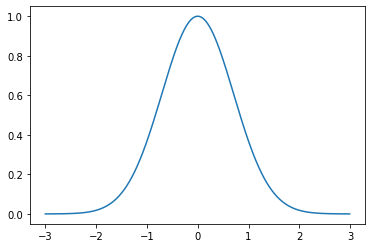

In [12]:
x = np.arange(-3, 3, 0.01)
plt.plot(x, np.exp(-x ** 2))

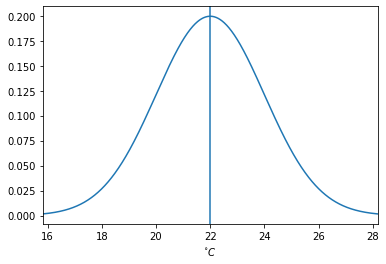

In [13]:
plot_gaussian_pdf(22, 4, mean_line = True, xlabel = '$^{\circ}C$')

In [14]:
print('Culmulative probability of range 21.5 to 22.5 is {:.2f}%'.format(norm_cdf((21.5, 22.5), 22.4) * 100))
print('Culmulative probability of range 23.5 to 24.5 is {:.2f}%'.format(norm_cdf((23.5, 24.5), 22.4) * 100))

Culmulative probability of range 21.5 to 22.5 is 35.58%
Culmulative probability of range 23.5 to 24.5 is 11.78%


In [15]:
print(norm_cdf((-1e8, 1e8), mu = 0, var = 4))
print(gaussian(x = 3.0, mean = 2.0, var = 1))
print(gaussian(x = [3.0, 2.0], mean = 2.0, var = 1))
print(gaussian(x = [3.0, 2.0], mean = 2.0, var = 1, normed = False))

1.0
0.24197072451914337
[0.37754067 0.62245933]
[0.24197072 0.39894228]


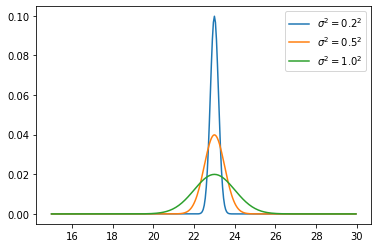

In [16]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2 ** 2), label = '$\sigma^2 = 0.2^2$')
plt.plot(xs, gaussian(xs, 23, 0.5 ** 2), label = '$\sigma^2 = 0.5^2$')
plt.plot(xs, gaussian(xs, 23, 1.0 ** 2), label = '$\sigma^2 = 1.0^2$')
plt.legend()

In [17]:
def plt_g(mu, variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
interact(plt_g, mu = FloatSlider(value = 5, min = 3, max = 7), variance = FloatSlider(value = 0.03, min = 0.01, max = 1.0))

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

<function __main__.plt_g(mu, variance)>

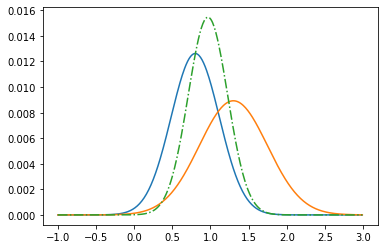

In [18]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean = 0.8, var = 0.1)
g2 = gaussian(x, mean = 1.3, var = 0.2)
plt.plot(x, g1, x, g2)

g = g1 * g2
g = g / sum(g)
plt.plot(x, g, ls = '-.')

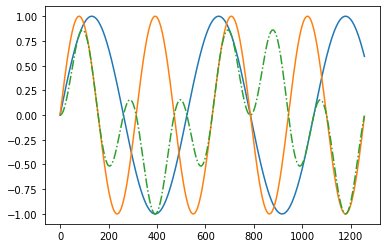

In [19]:
x = np.arange(0, 4 * np.pi, 0.01)
plt.plot(np.sin(1.2 * x))
plt.plot(np.sin(2.0 * x))
plt.plot(np.sin(1.2 * x) * np.sin(2.0 * x), ls = '-.')

## Gaussian Porpertity

1. Product of two independent Gaussians:

$$\Huge \mu = \frac{\sigma ^2_{1}\mu_{2} + \sigma^2_{2}\mu_{1}}{\sigma^2_{1} + \sigma ^2_{2}}$$

$$\Huge \sigma^2 = \frac{\sigma^2_{1}\sigma^2_{2}}{\sigma^2_{1} + \sigma^2_{2}}$$

2. Sum of two Gaussians:

$$\Huge \mu = \mu_{1} + \mu_{2}$$

$$\Huge \sigma^2 = \sigma^2_{1} + \sigma^2_{2}$$

In [20]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

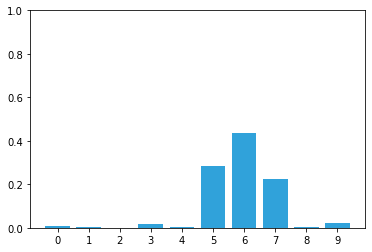

In [21]:
prior      = normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

mean: 5.88 var: 1.24


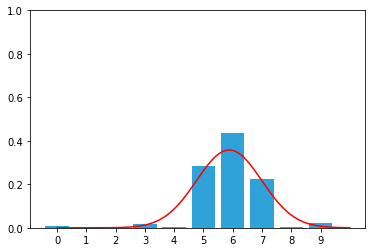

In [22]:
def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x, dtype = float)
    var = np.sum((x - mean) ** 2 * p)
    return mean, var

xs = np.arange(0, 10, 0.01)
mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed = False), c = 'r')
print('mean: %.2f' % mean, 'var: %.2f' % var)

p is probability distribution

$B$ is the evidence, $p(A)$ is prior, $p(B\lvert A)$ is the likelihood, and the $p(A\lvert B)$ is the posterior

We will use $\large x_{i}$ for position at $\large i$, and $\large z$ for measurement. Hence, we want to know $\large P(x_{i}\lvert z)$, that is, the probability of the dog being at $\large x_{i}$ given the measurement $\large z$.

$$\Huge p(x_{i} \lvert z) = \frac{p(z \lvert x_{i})p(x_{i})}{p(z)}$$

where $\large p(z\lvert x_{i})$ is the likelihood, or the probability for the measurement at every cell $\large x_{i}$.
$\large p(x_{i})$ is the prior,our belief before incorporating the measurements. $\large p(z)$ is the probability of getting the measurement z without taking the location into acoount.

In [23]:
def update(likelihood, prior):
    posterior = prior * likelihood
    return posterior

The probability of being at any position $\large i$ at time $\large t$ can be written as $\large P(X^t_{i})$. We computed that as the sum of the prior at tiem $\large t-1$, $P(X^{t-1}_{j})$ multiplied by the probability of moving from cell $\large x_{j}$ to $\large x_{i}$. That is

$$\Huge P(X^t_{i}) = \sum_{j} P(X^{t-1}_{j})P(x_{i}\lvert x_{j})$$

That is called as total probability theorem

In [24]:
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(x = 1.5, mean = 2, var = 3 * 3))
n23 = norm(2, 3)

# Forzen pdf
print('pdf of {} is {:.4f}'.format(1.5, n23.pdf(1.5)))
print('pdf of {} is {:.4f}'.format(2.5, n23.pdf(2.5)))
print('pdf of {} is {:.4f}'.format(2.0, n23.pdf(2.0)))

0.13114657203397997
0.13114657203397995
pdf of 1.5 is 0.1311
pdf of 2.5 is 0.1311
pdf of 2.0 is 0.1330


In [25]:
np.set_printoptions(precision = 3, linewidth = 50)
print(n23.rvs(size = 15))

[ 5.035  5.437  3.455  0.32   0.383  5.405  2.677
  5.25   2.726  4.493  2.018  1.609  3.948  4.71
 -0.349]


In [26]:
print(n23.cdf(2))
print(n23.cdf(2 + 1.5 *1))
print(n23.cdf(2 + 1.5 *2))
print(n23.cdf(2 + 1.5 *3))

0.5
0.6914624612740131
0.8413447460685429
0.9331927987311419


(-0.02, 0.09)

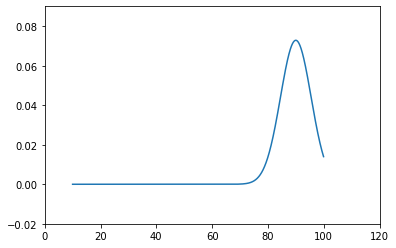

In [27]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label = 'var  =0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09)

In [28]:
def sense():
    return 10 + np.random.randn()*2

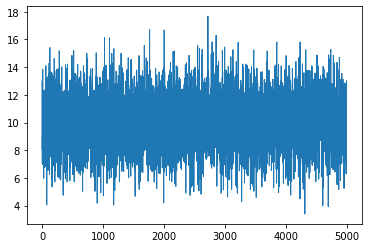

In [29]:
zs_1 = [sense() for i in range(5000)]
plt.plot(zs_1, lw = 1)

In [30]:
def rand_student_t(df, mu = 0, std = 1):
    x = random.gauss(0, std)
    y = 2.0 * random.gammavariate(0.5 * df, 2.0)
    return x/(math.sqrt(y/df)) + mu

def sense_t():
    return 10 + rand_student_t(7)*2

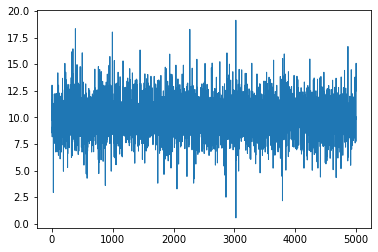

In [31]:
zs_2 = [sense_t() for i in range(5000)]
plt.plot(zs_2, lw = 1)

In [32]:
zs = [sense_t() for i in range(5000)]
scipy.stats.describe(zs)

DescribeResult(nobs=5000, minmax=(3.00784694536189, 22.901428665414578), mean=10.010944459351016, variance=2.795766271996515, skewness=0.15889857362817184, kurtosis=1.8937472526765227)

In [33]:
print(scipy.stats.describe(np.random.randn(10)))
print()
print(scipy.stats.describe(np.random.randn(300000)))

DescribeResult(nobs=10, minmax=(-2.3630195193039283, 1.1435785893918498), mean=0.031763108450072644, variance=1.2259250888145081, skewness=-0.9693651879277321, kurtosis=0.11319042208575958)

DescribeResult(nobs=300000, minmax=(-4.610510238505858, 4.754088992849784), mean=-0.001436807934214628, variance=1.0019970117639594, skewness=-0.0022670489968792495, kurtosis=-0.0005189476391955772)
